In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
%matplotlib inline

In [4]:
import plotly as py
import cufflinks as cf

In [5]:
from plotly.offline import iplot

In [6]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

Importing the datasets

In [7]:
worldcups = pd.read_csv(r"C:\Users\97798\Desktop\WorldCups.csv")
players = pd.read_csv(r"C:\Users\97798\Desktop\WorldCupPlayers.csv")
matches = pd.read_csv(r"C:\Users\97798\Desktop\WorldCupMatches.csv")

In [8]:
worldcups.head(
)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [9]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [10]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [11]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Cleaning

In [13]:
worldcups.isna().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

In [15]:
matches.dropna(subset = ['Year'], inplace = True)

In [16]:
matches.isna().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              2
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

In [18]:
players.isna().sum()

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

In [23]:
matches['Home Team Name'].value_counts()

Home Team Name
Brazil                        82
Italy                         57
Argentina                     54
Germany FR                    43
England                       35
                              ..
Wales                          1
Norway                         1
rn">United Arab Emirates       1
Haiti                          1
rn">Bosnia and Herzegovina     1
Name: count, Length: 78, dtype: int64

In [38]:
wrong = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].unique()

In [34]:
# wrong = list(matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].unique())

In [35]:
# wrong

['rn">United Arab Emirates',
 'rn">Republic of Ireland',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina']

In [43]:

# wrong.str.split('rn">')

In [45]:
wrong = pd.Series(wrong)

In [46]:
wrong

0      rn">United Arab Emirates
1       rn">Republic of Ireland
2       rn">Trinidad and Tobago
3     rn">Serbia and Montenegro
4    rn">Bosnia and Herzegovina
dtype: object

In [50]:
correct = wrong.str.split('rn">').str.get(1)

In [51]:
correct

0      United Arab Emirates
1       Republic of Ireland
2       Trinidad and Tobago
3     Serbia and Montenegro
4    Bosnia and Herzegovina
dtype: object

In [55]:
import pandas as pd

# Assuming you have a pandas DataFrame named "df" with a column named "Home Team"
matches["Home Team Name"] = matches["Home Team Name"].replace({
    'rn">United Arab Emirates': 'United Arab Emirates',
    'rn">Republic of Ireland': 'Republic of Ireland',
    'rn">Trinidad and Tobago': 'Trinidad and Tobago',
    'rn">Serbia and Montenegro': 'Serbia and Montenegro',
    'rn">Bosnia and Herzegovina': 'Bosnia and Herzegovina'
})


In [57]:
matches['Home Team Name'].value_counts()

Home Team Name
Brazil                    82
Italy                     57
Argentina                 54
Germany FR                43
England                   35
                          ..
Wales                      1
Norway                     1
United Arab Emirates       1
Haiti                      1
Bosnia and Herzegovina     1
Name: count, Length: 78, dtype: int64

Most number of world cup winning Title 

In [61]:
winners = worldcups.Winner.value_counts()

In [63]:
winners.iplot(
    kind = 'bar',
    xTitle = 'Name of the country',
    yTitle = 'Count'
)


In [68]:
runners_up = worldcups['Runners-Up'].value_counts()

In [71]:
runners_up.iplot(
    kind = 'bar',
    xTitle = 'Name of Country',
    yTitle = 'count',
    title = 'Number of Times Runner ups'
)

In [72]:
third_place= worldcups.Third.value_counts()

In [74]:
third_place

Third
Germany        3
Brazil         2
Sweden         2
France         2
Poland         2
USA            1
Austria        1
Chile          1
Portugal       1
Germany FR     1
Italy          1
Croatia        1
Turkey         1
Netherlands    1
Name: count, dtype: int64

In [87]:
teams = pd.concat(
    [winners, runners_up, third_place],
    axis =1
)
teams

,count,count,count
Brazil,5.0,2.0,2.0
Italy,4.0,2.0,1.0
Germany FR,3.0,3.0,1.0
Uruguay,2.0,NaN,NaN
Argentina,2.0,3.0,NaN
England,1.0,NaN,NaN
France,1.0,1.0,2.0
Spain,1.0,NaN,NaN
Germany,1.0,1.0,3.0
Netherlands,NaN,3.0,1.0


In [84]:
teams.fillna(0, inplace = True)

Number of Goal per country

In [155]:
home = matches.groupby('Home Team Name')['Home Team Goals'].agg('sum')

In [156]:
away = matches.groupby('Away Team Name')['Away Team Goals'].agg('sum')

In [157]:
home

Home Team Name
Algeria                   5.0
Angola                    0.0
Argentina               111.0
Australia                 7.0
Austria                  31.0
                        ...  
United Arab Emirates      0.0
Uruguay                  62.0
Wales                     2.0
Yugoslavia               42.0
Zaire                     0.0
Name: Home Team Goals, Length: 77, dtype: float64

In [159]:
away

Away Team Name
Algeria                        9.0
Angola                         1.0
Argentina                     22.0
Australia                      4.0
Austria                       12.0
                              ... 
rn">Bosnia and Herzegovina     1.0
rn">Republic of Ireland        8.0
rn">Serbia and Montenegro      2.0
rn">Trinidad and Tobago        0.0
rn">United Arab Emirates       2.0
Name: Away Team Goals, Length: 82, dtype: float64

In [160]:
home = pd.DataFrame(home, )

In [161]:
away = pd.DataFrame(away)

In [162]:
away

,Away Team Goals
Away Team Name,
Algeria,9.0
Angola,1.0
Argentina,22.0
Australia,4.0
Austria,12.0
...,...
"rn"">Bosnia and Herzegovina",1.0
"rn"">Republic of Ireland",8.0
"rn"">Serbia and Montenegro",2.0


In [174]:
home.columns = ['Countries','Goals']
home

,Countries,Goals
0,Algeria,5.0
1,Angola,0.0
2,Argentina,111.0
3,Australia,7.0
4,Austria,31.0
...,...,...
72,United Arab Emirates,0.0
73,Uruguay,62.0
74,Wales,2.0
75,Yugoslavia,42.0


In [164]:
home.reset_index(inplace = True)

In [177]:
away.columns = ['Countries', 'Goals']
# away.reset_index(inplace=True)

In [178]:
away

,Countries,Goals
0,Algeria,9.0
1,Angola,1.0
2,Argentina,22.0
3,Australia,4.0
4,Austria,12.0
...,...,...
77,"rn"">Bosnia and Herzegovina",1.0
78,"rn"">Republic of Ireland",8.0
79,"rn"">Serbia and Montenegro",2.0
80,"rn"">Trinidad and Tobago",0.0


In [179]:
goals  = pd.merge(home, away, on = 'Countries')


In [180]:
goals['Total Goals'] = goals.Goals_x + goals.Goals_y

In [181]:
goals.drop(['Goals_x', 'Goals_y'], axis =1, inplace=True)

In [183]:
goals.sort_values('Total Goals', ascending=False )
                

,Countries,Total Goals
25,Germany,235.0
7,Brazil,225.0
2,Argentina,133.0
34,Italy,128.0
23,France,108.0
...,...,...
6,Bolivia,1.0
1,Angola,1.0
12,China PR,0.0
10,Canada,0.0


Top 20 teams with maximum number of goals`

In [184]:
top_20_goals = goals.nlargest(20, columns=['Total Goals'])

In [185]:
top_20_goals.set_index('Countries', inplace = True)

In [186]:
top_20_goals.iplot(
    kind = 'bar',
    xTitle = 'Name of Country',
    yTitle = 'Number of goals',
    title = '20 Countries with Maximum goals Scored'
)

In [153]:
matches['Away Team Name'] = matches['Away Team Name'].str.replace('Germany FR', 'Germany')

In [154]:
matches['Away Team Name'].value_counts()

Away Team Name
Mexico               38
Germany              33
France               30
Spain                29
Argentina            27
                     ..
Togo                  1
Zaire                 1
Iraq                  1
Dutch East Indies     1
Czech Republic        1
Name: count, Length: 82, dtype: int64

Attendance, Number of teams, goals and matches per cup

In [187]:
worldcups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [190]:
worldcups.Attendance = worldcups.Attendance.str.replace('.',' ')

In [192]:
worldcups

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590 549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363 000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375 700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1 045 246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768 607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819 810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893 172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1 563 135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1 603 975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1 865 753


In [202]:
worldcups.Attendance = worldcups.Attendance.str.replace(' ', '')

In [208]:
data = worldcups.groupby('Year').Attendance.agg('mean')

In [209]:
data = pd.DataFrame(data)

In [213]:
data.reset_index(inplace=True)

Text(0.5, 1.0, 'Attendance Per Year')

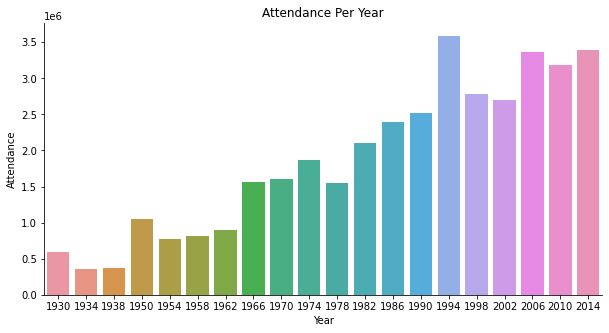

In [223]:
fig, ax = plt.subplots(figsize = (10,5))

sns.despine(right=True)
g = sns.barplot(
    data = data,
    x = 'Year',
    y = 'Attendance'
    
)

g.set_title('Attendance Per Year')


In [227]:
teams_per_year = worldcups.groupby('Year').QualifiedTeams.agg('mean')

In [228]:
teams_per_year = pd.DataFrame(teams_per_year)

In [230]:
teams_per_year.reset_index(inplace = True)

In [231]:
teams_per_year

,Year,QualifiedTeams
0,1930,13.0
1,1934,16.0
2,1938,15.0
3,1950,13.0
4,1954,16.0
5,1958,16.0
6,1962,16.0
7,1966,16.0
8,1970,16.0
9,1974,16.0


Text(0.5, 1.0, 'Number of Qualified Teams per Year')

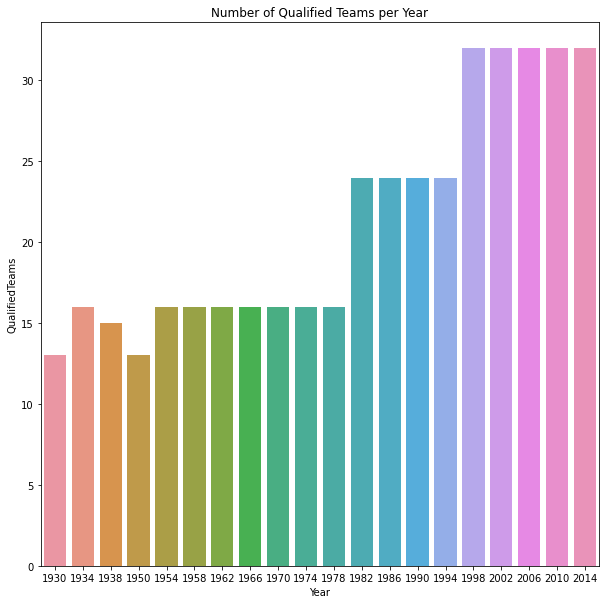

In [237]:
fig, ax = plt.subplots(figsize = (10,10))

h = sns.barplot(
    data = teams_per_year,
    x = 'Year',
    y = 'QualifiedTeams'
)

h.set_title('Number of Qualified Teams per Year')

In [243]:
worldcups.groupby('Year').GoalsScored.agg('mean')

Year
1930     70.0
1934     70.0
1938     84.0
1950     88.0
1954    140.0
1958    126.0
1962     89.0
1966     89.0
1970     95.0
1974     97.0
1978    102.0
1982    146.0
1986    132.0
1990    115.0
1994    141.0
1998    171.0
2002    161.0
2006    147.0
2010    145.0
2014    171.0
Name: GoalsScored, dtype: float64

In [244]:
goals_per_year = pd.DataFrame(worldcups.groupby('Year').GoalsScored.agg('mean'))

In [246]:
goals_per_year.reset_index(inplace = True)

In [248]:
goals_per_year

,Year,GoalsScored
0,1930,70.0
1,1934,70.0
2,1938,84.0
3,1950,88.0
4,1954,140.0
5,1958,126.0
6,1962,89.0
7,1966,89.0
8,1970,95.0
9,1974,97.0


Text(0.5, 1.0, 'Number of Goals per Year')

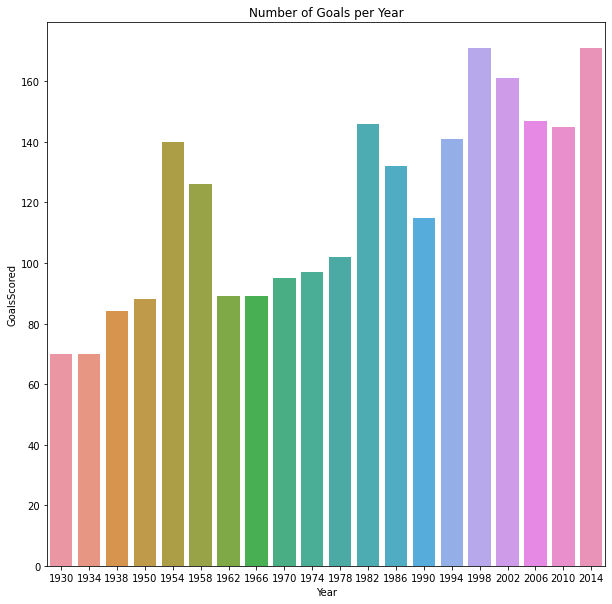

In [252]:
fig, ax = plt.subplots(figsize = (10,10))

h = sns.barplot(
    data = goals_per_year,
    x = 'Year',
    y = 'GoalsScored'
)

h.set_title('Number of Goals per Year')

In [256]:
matches_per_year = worldcups.groupby('Year').MatchesPlayed.agg('mean')

In [257]:
matches_per_year = pd.DataFrame(matches_per_year)

In [259]:
matches_per_year.reset_index(inplace=True)

In [260]:
matches_per_year

,Year,MatchesPlayed
0,1930,18.0
1,1934,17.0
2,1938,18.0
3,1950,22.0
4,1954,26.0
5,1958,35.0
6,1962,32.0
7,1966,32.0
8,1970,32.0
9,1974,38.0


Text(0.5, 1.0, 'Number of matches played per Year')

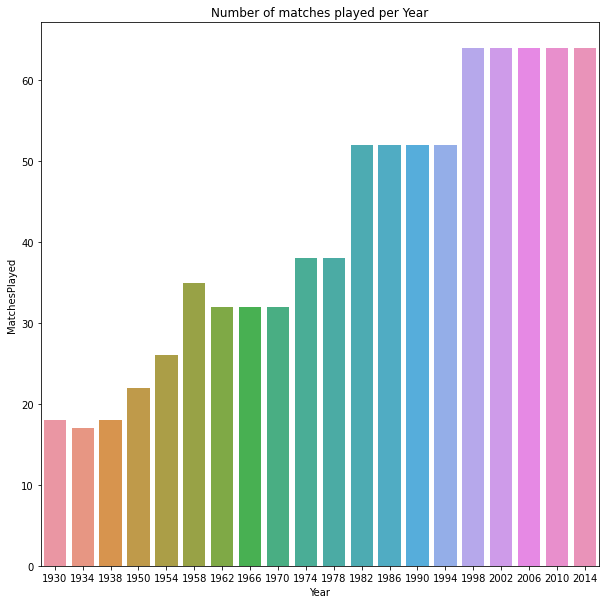

In [261]:
fig, ax = plt.subplots(figsize = (10,10))

h = sns.barplot(
    data = matches_per_year,
    x = 'Year',
    y = 'MatchesPlayed'
)

h.set_title('Number of matches played per Year')

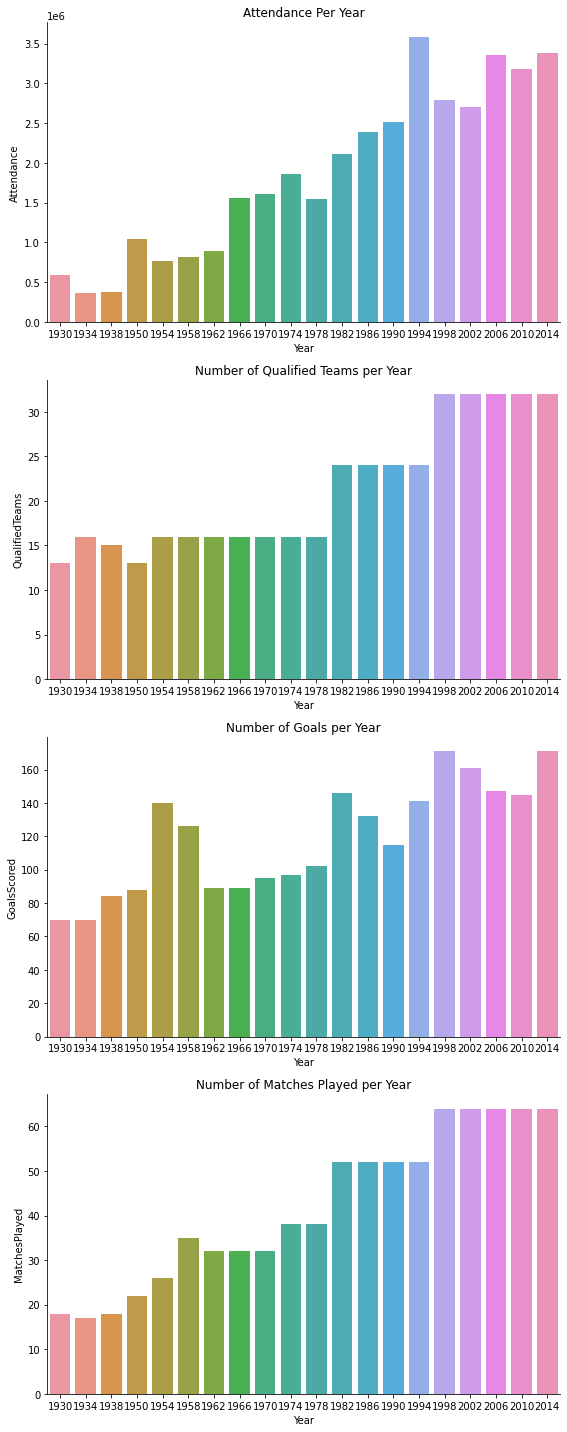

In [274]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure and subplots
fig, axes = plt.subplots(4, 1, figsize=(8, 20))

# Plot 1: Attendance Per Year
sns.despine(right=True, ax=axes[0])
sns.barplot(data=data, x='Year', y='Attendance', ax=axes[0])
axes[0].set_title('Attendance Per Year')

# Plot 2: Number of Qualified Teams per Year
sns.despine(right=True, ax=axes[1])
sns.barplot(data=teams_per_year, x='Year', y='QualifiedTeams', ax=axes[1])
axes[1].set_title('Number of Qualified Teams per Year')

# Plot 3: Number of Goals per Year
sns.despine(right=True, ax=axes[2])
sns.barplot(data=goals_per_year, x='Year', y='GoalsScored', ax=axes[2])
axes[2].set_title('Number of Goals per Year')

# Plot 4: Number of Matches Played per Year
sns.despine(right=True, ax=axes[3])
sns.barplot(data=matches_per_year, x='Year', y='MatchesPlayed', ax=axes[3])
axes[3].set_title('Number of Matches Played per Year')

# Adjust the spacing between subplots if needed
plt.tight_layout()

# Show the figure
plt.show()


Goals Per Team Per WorldCup

In [291]:
home = matches.groupby(['Year','Home Team Name'])['Home Team Goals'].agg('sum')

In [292]:
home

Year    Home Team Name
1930.0  Argentina         16.0
        Brazil             4.0
        Chile              4.0
        France             4.0
        Paraguay           1.0
                          ... 
2014.0  Russia             1.0
        Spain              1.0
        Switzerland        4.0
        USA                2.0
        Uruguay            3.0
Name: Home Team Goals, Length: 366, dtype: float64

In [293]:
away = matches.groupby(['Year','Away Team Name'])['Away Team Goals'].agg('sum')

In [294]:
away

Year    Away Team Name
1930.0  Argentina         2.0
        Belgium           0.0
        Bolivia           0.0
        Brazil            1.0
        Chile             1.0
                         ... 
2014.0  Russia            1.0
        Spain             3.0
        Switzerland       3.0
        USA               4.0
        Uruguay           1.0
Name: Away Team Goals, Length: 411, dtype: float64

In [296]:
goals = pd.concat([home, away], axis =1)
goals


Home Team Goals  Away Team Goals
Year                                              
1930.0 Argentina             16.0              2.0
       Brazil                 4.0              1.0
       Chile                  4.0              1.0
       France                 4.0              0.0
       Paraguay               1.0              0.0
...                           ...              ...
1998.0 Iran                   NaN              2.0
       Mexico                 NaN              8.0
       Norway                 NaN              5.0
       Tunisia                NaN              1.0
2006.0 IR Iran                NaN              0.0

[427 rows x 2 columns]

In [300]:
goals.fillna(0, inplace=True)

In [303]:
goals['Goals'] = goals['Home Team Goals'] + goals['Away Team Goals']

In [304]:
goals

Home Team Goals  Away Team Goals  Goals
Year                                                     
1930.0 Argentina             16.0              2.0   18.0
       Brazil                 4.0              1.0    5.0
       Chile                  4.0              1.0    5.0
       France                 4.0              0.0    4.0
       Paraguay               1.0              0.0    1.0
...                           ...              ...    ...
1998.0 Iran                   0.0              2.0    2.0
       Mexico                 0.0              8.0    8.0
       Norway                 0.0              5.0    5.0
       Tunisia                0.0              1.0    1.0
2006.0 IR Iran                0.0              0.0    0.0

[427 rows x 3 columns]

In [305]:
goals.drop(['Home Team Goals', 'Away Team Goals'], axis =1, inplace=True)

In [307]:
goals.reset_index(inplace = True)

In [309]:
goals.columns = ['Year','Country','Goals']

In [311]:
goals = goals.sort_values(by = ['Year', 'Goals'], ascending=(True, False))

In [312]:
goals

,Year,Country,Goals
0,1930.0,Argentina,18.0
7,1930.0,Uruguay,15.0
6,1930.0,USA,7.0
8,1930.0,Yugoslavia,7.0
1,1930.0,Brazil,5.0
...,...,...,...
355,2014.0,Japan,2.0
361,2014.0,Russia,2.0
340,2014.0,Cameroon,1.0
352,2014.0,Honduras,1.0


In [315]:
top5 = goals.groupby('Year').head(5)
top5.head(10)

,Year,Country,Goals
0,1930.0,Argentina,18.0
7,1930.0,Uruguay,15.0
6,1930.0,USA,7.0
8,1930.0,Yugoslavia,7.0
1,1930.0,Brazil,5.0
13,1934.0,Italy,12.0
11,1934.0,Germany,11.0
10,1934.0,Czechoslovakia,9.0
9,1934.0,Austria,7.0
12,1934.0,Hungary,5.0


In [320]:
import plotly.graph_objects as go

In [321]:
x, y = goals['Year'].values, goals['Goals'].values

In [322]:
data = []

In [328]:
for team in top5['Country'].drop_duplicates().values:
    year = top5[top5['Country'] == team]['Year']
    goal = top5[top5['Country'] ==  team]['Goals']
    
    data.append(go.Bar(x = year,
                      y = goal,
                      name = team))
layout = go.Layout(
    barmode='stack',
    title= 'Top 5 teams with Most Goals',
    showlegend=False
)
fig = go.Figure(data=data, layout=layout)
fig.show()

Matches with Highest Number of Attendance

In [329]:
matches.head(1)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX


In [331]:

# Assuming you have a pandas DataFrame named "df" with a column named "Date_with_Time"
matches["Datetime"] = matches["Datetime"].str.split(" - ").str[0]



In [342]:
matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,05 Jul 2014,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED


In [343]:
top10 = matches.sort_values(by = 'Attendance', ascending = False)

In [344]:
top10['vs'] = top10['Home Team Name'] + 'vs' + top10['Away Team Name']

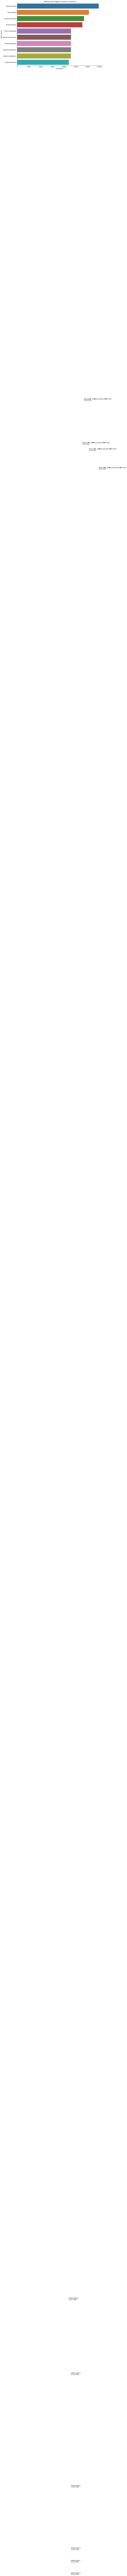

In [361]:
plt.figure(figsize = (12,9))

# sns.despine(right = True)
ax = sns.barplot(
    data = top10,
    y = 'vs',
    x = 'Attendance'
)

sns.despine(right = True)

plt.xlabel('Attendance')
plt.ylabel('Match Teams')
plt.title('Matches with Highest number of matches')

for i, row in top10.iterrows():
    attendance = row['Attendance']
    stadium = row['Stadium']
    date = row['Datetime']  # Extracting the date only
    
    ax.text(attendance, i, f"{stadium}\n{date}", va='center')

plt.show()


In [348]:
top10 = top10.sort_values(by='Attendance', ascending=False).head(10)

In [349]:
top10

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,vs
74,1950.0,16 Jul 1950,Group 6,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Uruguay,2.0,1.0,Brazil,,...,0.0,0.0,READER George (ENG),ELLIS Arthur (ENG),MITCHELL George (SCO),209.0,1190.0,URU,BRA,UruguayvsBrazil
71,1950.0,13 Jul 1950,Group 6,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Brazil,6.0,1.0,Spain,,...,3.0,0.0,LEAFE Reginald (ENG),MITCHELL George (SCO),DA COSTA VIEIRA Jose (POR),209.0,1186.0,BRA,ESP,BrazilvsSpain
63,1950.0,01 Jul 1950,Group 1,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Brazil,2.0,0.0,Yugoslavia,,...,1.0,0.0,GRIFFITHS Benjamin (WAL),BERANEK Alois (AUT),DA COSTA VIEIRA Jose (POR),208.0,1191.0,BRA,YUG,BrazilvsYugoslavia
70,1950.0,09 Jul 1950,Group 6,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Brazil,7.0,1.0,Sweden,,...,3.0,0.0,ELLIS Arthur (ENG),GARCIA Prudencio (USA),DE LA SALLE Charles (FRA),209.0,1189.0,BRA,SWE,BrazilvsSweden
379,1986.0,07 Jun 1986,Group B,Estadio Azteca,Mexico City,Mexico,1.0,1.0,Paraguay,,...,1.0,0.0,COURTNEY George (ENG),FREDRIKSSON Erik (SWE),IGNA Ioan (ROU),308.0,680.0,MEX,PAR,MexicovsParaguay
411,1986.0,29 Jun 1986,Final,Estadio Azteca,Mexico City,Argentina,3.0,2.0,Germany,,...,1.0,0.0,ARPPI FILHO Romualdo (BRA),FREDRIKSSON Erik (SWE),ULLOA MORERA Berny (CRC),3467.0,393.0,ARG,FRG,ArgentinavsGermany
397,1986.0,15 Jun 1986,Round of 16,Estadio Azteca,Mexico City,Mexico,2.0,0.0,Bulgaria,,...,1.0,0.0,ARPPI FILHO Romualdo (BRA),MENDEZ MOLINA Romulo (GUA),IGNA Ioan (ROU),309.0,463.0,MEX,BUL,MexicovsBulgaria
407,1986.0,22 Jun 1986,Quarter-finals,Estadio Azteca,Mexico City,Argentina,2.0,1.0,England,,...,0.0,0.0,BENNACEUR Ali (TUN),ULLOA MORERA Berny (CRC),DOTCHEV Bogdan (BUL),714.0,392.0,ARG,ENG,ArgentinavsEngland
409,1986.0,25 Jun 1986,Semi-finals,Estadio Azteca,Mexico City,Argentina,2.0,0.0,Belgium,,...,0.0,0.0,MARQUEZ RAMIREZ Antonio (MEX),MENDEZ MOLINA Romulo (GUA),SILVA VALENTE Carlos Alberto (POR),3469.0,388.0,ARG,BEL,ArgentinavsBelgium
367,1986.0,03 Jun 1986,Group B,Estadio Azteca,Mexico City,Belgium,1.0,2.0,Mexico,,...,1.0,2.0,ESPOSITO Carlos (ARG),SILVA VALENTE Carlos Alberto (POR),MENDEZ MOLINA Romulo (GUA),308.0,428.0,BEL,MEX,BelgiumvsMexico


Stadiums with Highest Average Attendance

In [364]:
matches.Stadium.unique()

array(['Pocitos', 'Parque Central', 'Estadio Centenario',
       'Stadio Benito Mussolini', 'Giorgio Ascarelli', 'San Siro',
       'Littorale', 'Giovanni Berta', 'Luigi Ferraris', 'Nazionale PNF',
       'Littorio', 'Parc des Princes', 'Velodrome Municipale',
       'Stade Olympique', 'Stade Municipal', 'Stade V�lodrome',
       'Stade de la Meinau', 'Cavee Verte', 'Stade du Parc Lescure',
       'Victor Boucquey', 'Fort Carree',
       'Maracan� - Est�dio Jornalista M�rio Filho', 'Durival de Brito',
       'Pacaembu', 'Independencia', 'Eucaliptos', 'Ilha do Retiro',
       'Wankdorf Stadium', 'Hardturm', 'Charmilles', 'La Pontaise',
       'St. Jakob', 'Comunale di Cornaredo', 'Rasunda Stadium',
       'Nya Ullevi', 'Malmo Stadion', 'Jarnvallen', 'Idrottsparken',
       'Arosvallen', 'Rimnersvallen', 'Orjans Vall', 'Ryavallen',
       'Olympia Stadium', 'Tunavallen', 'Eyravallen', 'Carlos Dittborn',
       'Estadio Sausalito', 'Estadio El Teniente-Codelco', 'Nacional',
       'Wemble

In [366]:
matches.Stadium  = matches.Stadium.str.replace('�','')

In [368]:
matches.Stadium.unique()

array(['Pocitos', 'Parque Central', 'Estadio Centenario',
       'Stadio Benito Mussolini', 'Giorgio Ascarelli', 'San Siro',
       'Littorale', 'Giovanni Berta', 'Luigi Ferraris', 'Nazionale PNF',
       'Littorio', 'Parc des Princes', 'Velodrome Municipale',
       'Stade Olympique', 'Stade Municipal', 'Stade Vlodrome',
       'Stade de la Meinau', 'Cavee Verte', 'Stade du Parc Lescure',
       'Victor Boucquey', 'Fort Carree',
       'Maracan - Estdio Jornalista Mrio Filho', 'Durival de Brito',
       'Pacaembu', 'Independencia', 'Eucaliptos', 'Ilha do Retiro',
       'Wankdorf Stadium', 'Hardturm', 'Charmilles', 'La Pontaise',
       'St. Jakob', 'Comunale di Cornaredo', 'Rasunda Stadium',
       'Nya Ullevi', 'Malmo Stadion', 'Jarnvallen', 'Idrottsparken',
       'Arosvallen', 'Rimnersvallen', 'Orjans Vall', 'Ryavallen',
       'Olympia Stadium', 'Tunavallen', 'Eyravallen', 'Carlos Dittborn',
       'Estadio Sausalito', 'Estadio El Teniente-Codelco', 'Nacional',
       'Wembley St

In [374]:
std = matches.groupby(['Stadium', 'City']).Attendance.agg('mean').reset_index()

In [377]:
std = std.sort_values(by = 'Attendance', ascending=False)
std

,Stadium,City,Attendance
99,Maracan - Estdio Jornalista Mrio Filho,Rio De Janeiro,101692.625000
32,Estadio Azteca,Mexico City,100923.684211
137,Rose Bowl,Los Angeles,92600.875000
179,Wembley Stadium,London,86448.222222
151,Soccer City Stadium,Johannesburg,83857.375000
...,...,...,...
65,Giorgio Ascarelli,Naples,8000.000000
76,Independencia,Belo Horizonte,7590.333333
49,Eucaliptos,Porto Alegre,7329.000000
58,Fort Carree,Antibes,7000.000000


In [378]:
top10 = std.nlargest(10,columns=['Attendance'])

In [379]:
top10

,Stadium,City,Attendance
99,Maracan - Estdio Jornalista Mrio Filho,Rio De Janeiro,101692.625000
32,Estadio Azteca,Mexico City,100923.684211
137,Rose Bowl,Los Angeles,92600.875000
179,Wembley Stadium,London,86448.222222
151,Soccer City Stadium,Johannesburg,83857.375000
146,Santiago Bernabeu,Madrid,82522.250000
167,Stanford Stadium,San Francisco,81737.333333
159,Stade de France,Saint-Denis,78222.222222
48,Estadio do Maracana,Rio De Janeiro,74197.100000
64,Giants Stadium,New York/New Jersey,73689.714286


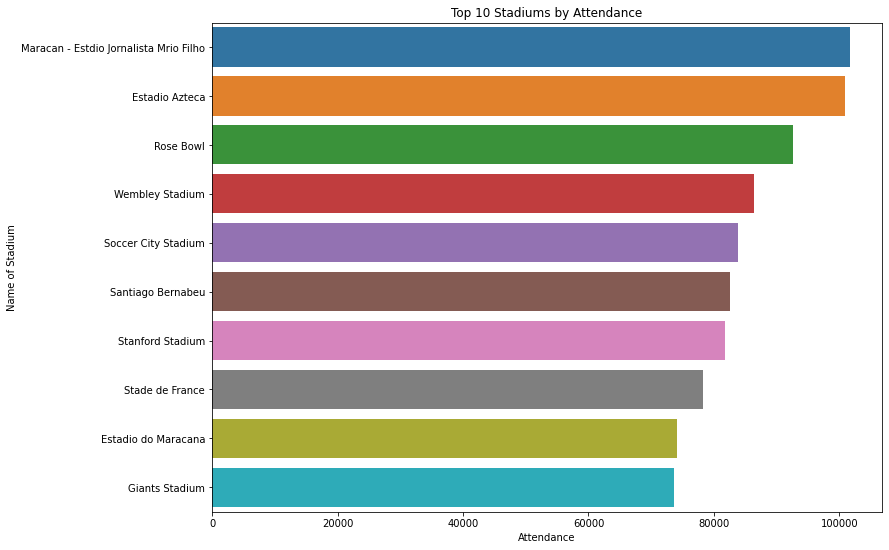

In [386]:
plt.figure(figsize=(12,9))

sns.despine(right=True)
sns.barplot(
    data = top10,
    x = 'Attendance',
    y = 'Stadium'
)

plt.xlabel('Attendance')
plt.ylabel('Name of Stadium')
plt.title('Top 10 Stadiums by Attendance')


for i, (attendance, stadium, city) in enumerate(zip(top10['Attendance'], top10['Stadium'], top10['City'])):
    ax.text(attendance, i, f"{stadium}\n{city}", va='center', ha='right')


plt.show()

In [394]:
matches.City.value_counts().nlargest(20).iplot(kind = 'bar',
                                               xTitle = 'City Name',
                                               yTitle = 'Number of matches played'
                                              )

Match outcomes by home and away teams

In [402]:

# Custom function to determine match outcome
def get_outcome(row):
    if row['Home Team Goals'] > row['Away Team Goals']:
        return 'Home Team Wins'
    elif row['Home Team Goals'] < row['Away Team Goals']:
        return 'Away Team Wins'
    else:
        return 'Draw'

# Apply the custom function to create the 'Outcome' column
matches['Outcome'] = matches.apply(get_outcome, axis=1)

print(matches['Outcome'])


0      Home Team Wins
1      Home Team Wins
2      Home Team Wins
3      Home Team Wins
4      Home Team Wins
            ...      
847              Draw
848    Away Team Wins
849              Draw
850    Away Team Wins
851    Home Team Wins
Name: Outcome, Length: 852, dtype: object


Text(0.5, 1.0, 'Match outcomes by home and away Teams')

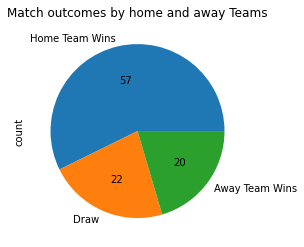

In [412]:
matches.Outcome.value_counts().plot(kind = 'pie',
                                   autopct = '%1.0f',
                                   )


plt.title('Match outcomes by home and away Teams')